In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [74]:
NUM_TO_NAME =  {
    0: "Helix",
    1: "Coil",
    2: "Strand",
    3: "Average",
}

def PLOT(model_type, attr, fig_axs=None):
    
    LABELS = ["-"+str(x) for x in range(8,0,-1)]+[str(0)]+[str(x) for x in range(1,9,1)]
    if fig_axs is None:
        fig, axs = plt.subplots(1,4, figsize=(16, 3), sharey=True, sharex=True)
    else:
        fig, axs = fig_axs
    
    
    # if "Regress" in model_type:
    #     attr = [[a**0.4 for a in att] for att in attr]
    
    
    for target in range(4):
        #for c in range(4):

            c = 0
            X = 0
            Y = target
            ax = axs[Y]

            ax.yaxis.tick_right()
            if Y==3:
                ax.yaxis.set_tick_params(labelright=True, labelleft=False)
                pass
            else:

                for label in ax.get_yticklabels():
                    label.set_visible(False)

            ax.set_title(f"{NUM_TO_NAME[target]}")

            abs_attr17_0 = attr[target]
                
            x_axis_data = list(range(len(abs_attr17_0)))
            y_values = [0]+abs_attr17_0+[0]
            ax.bar(
                [-1]+x_axis_data+[len(abs_attr17_0)],
                y_values,
                color="steelblue",
                lw=1,
                alpha=1,
                width=.9,
            )

            ax.set_xlim(-1,len(abs_attr17_0))
            ax.set_xticks(x_axis_data)
            ax.set_xticklabels(LABELS)

    axs[0].set_ylabel(model_type)
    plt.tight_layout()
    fig.subplots_adjust(hspace=0.1, wspace=0)
    return fig, axs

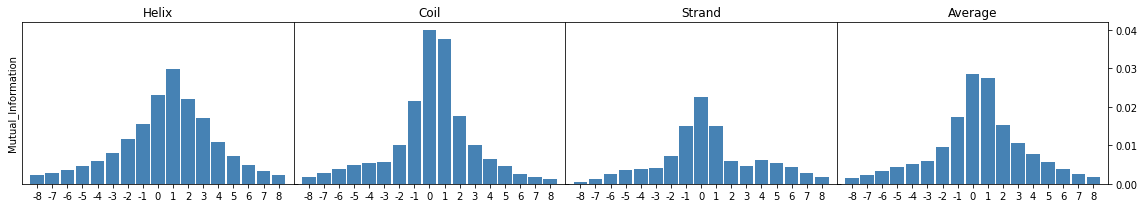

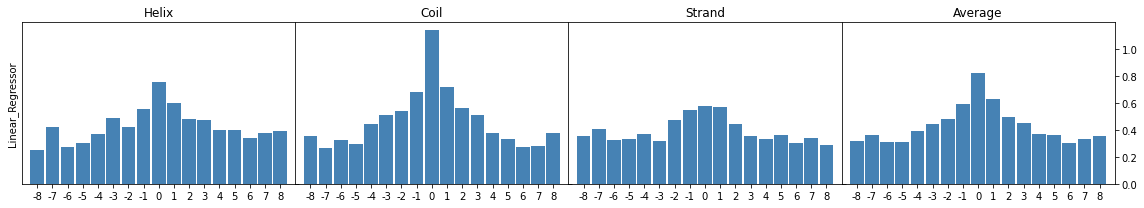

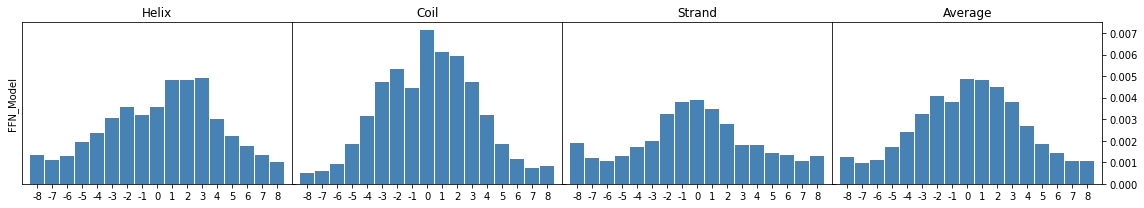

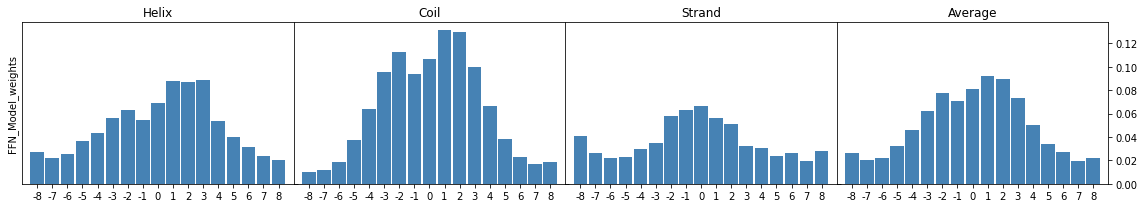

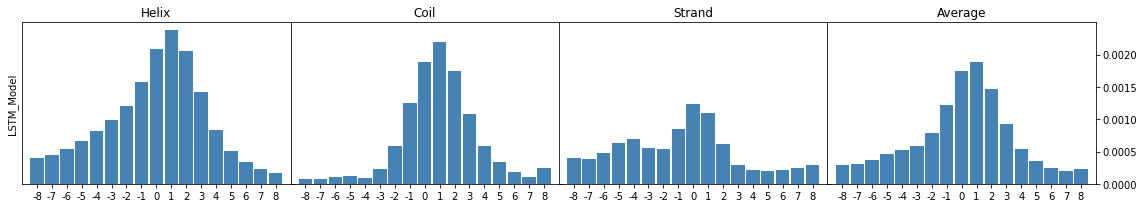

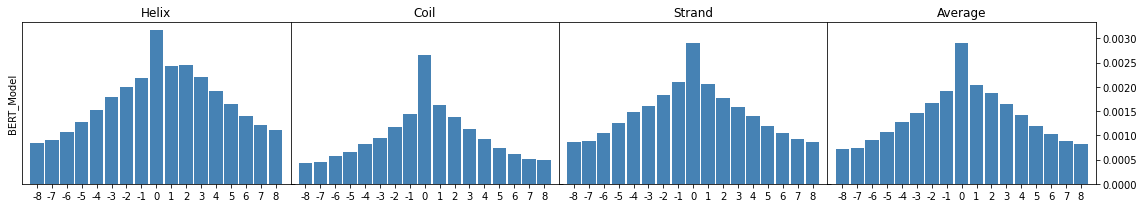

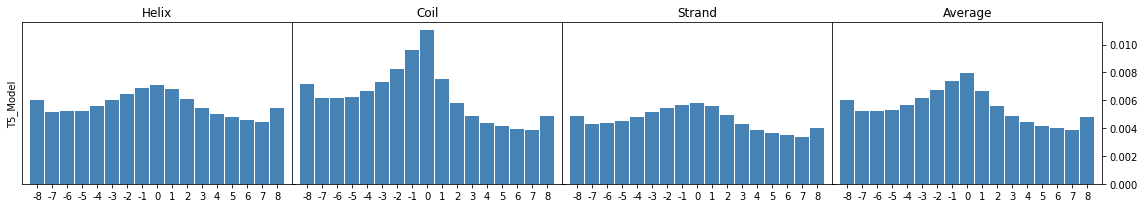

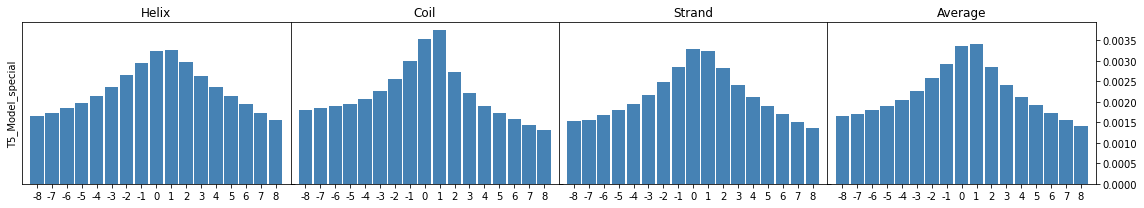

In [80]:
for MODEL_TYPE in ["Mutual_Information", "Linear_Regressor", "FFN_Model", "FFN_Model_weights", "LSTM_Model", "BERT_Model", "T5_Model", "T5_Model_special"]:

    attr = []
    for c in range(3):
        attr.append(pd.read_csv(f"avg_deeplift_attributions/{MODEL_TYPE}_attr_class_{c}.csv", header=None).values[:,0].tolist())
    
    attr.append(np.array(attr).mean(0).tolist())
    fig_axs = PLOT(MODEL_TYPE, attr)
    plt.savefig(f"plots/ATTR_{MODEL_TYPE}.pdf")
    plt.show()